**1. Importing libraries and basic inspection of the dataframe**

In [843]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [844]:
#importing dataset

df=pd.read_csv("Leads.csv")

In [845]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [846]:
df.shape

(9240, 37)

In [847]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [848]:
#checking % null values in each column
round(100*df.isnull().sum()/len(df))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

**2. EDA**


In [849]:
#Drop all the columns with more than 40% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, axis=1, inplace=True)

In [850]:
# First 2 columns can also be dropped as they are just the identifiers
df.drop(['Prospect ID','Lead Number'],axis=1, inplace=True)

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [852]:
#Separating numerical & categorical variables
num=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [853]:
df[num].describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [854]:
df[cat].describe()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,...,9240,9240,5887,9240,9240,6531,7820,9240,9240,9240
unique,5,21,2,2,17,38,19,10,6,3,...,2,1,26,1,1,6,7,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified
freq,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,...,9233,9240,2072,9240,9240,4146,3222,9240,6352,3407


In [855]:
#Replacing 'Select' values with Nan
df=df.replace("Select", np.nan)

In [856]:
df[cat].describe()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9137,6779,5860,1990,6550,6531,...,9240,9240,5887,9240,9240,2385,5571,9240,9240,9240
unique,5,21,2,2,17,38,18,9,6,3,...,2,1,26,1,1,5,6,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Modified
freq,4886,2868,8506,9238,3437,6492,976,808,5600,6528,...,9233,9240,2072,9240,9240,1613,3222,9240,6352,3407


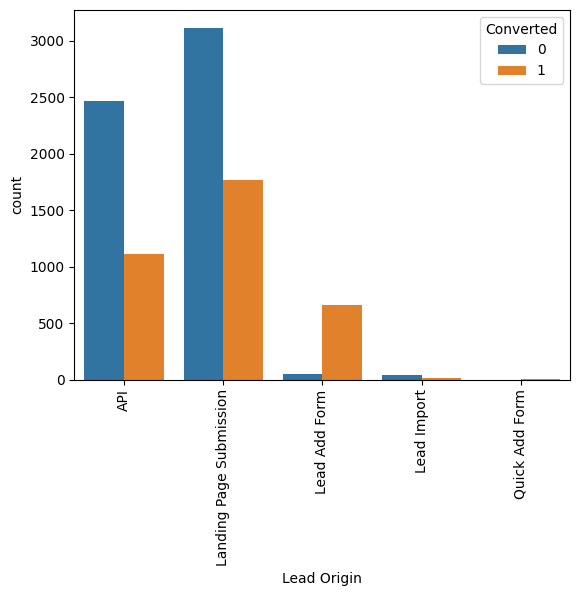

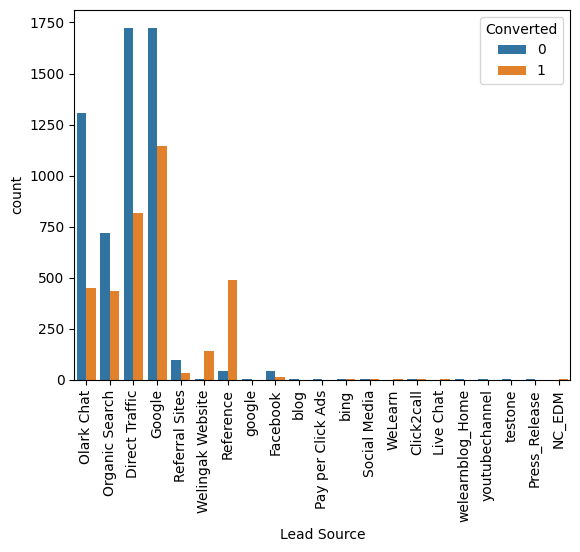

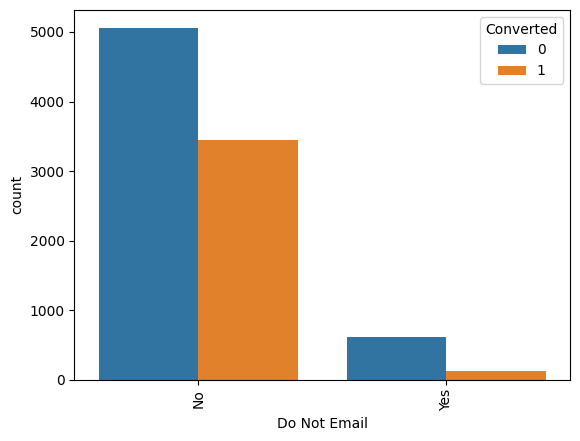

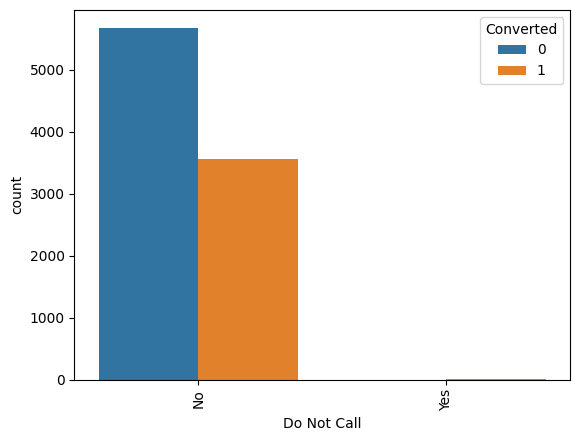

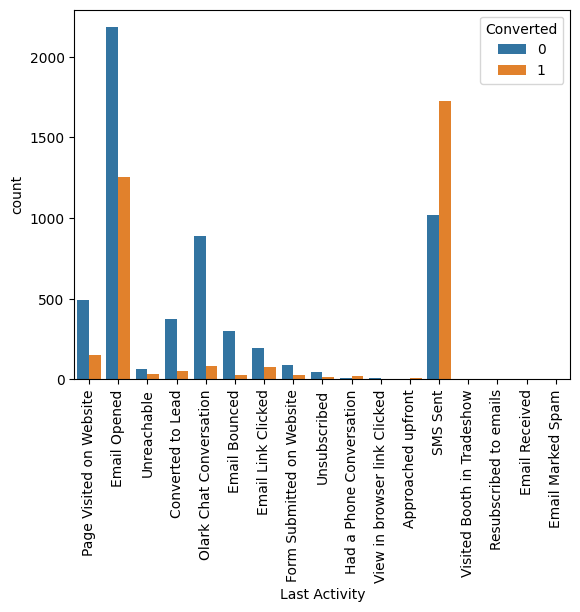

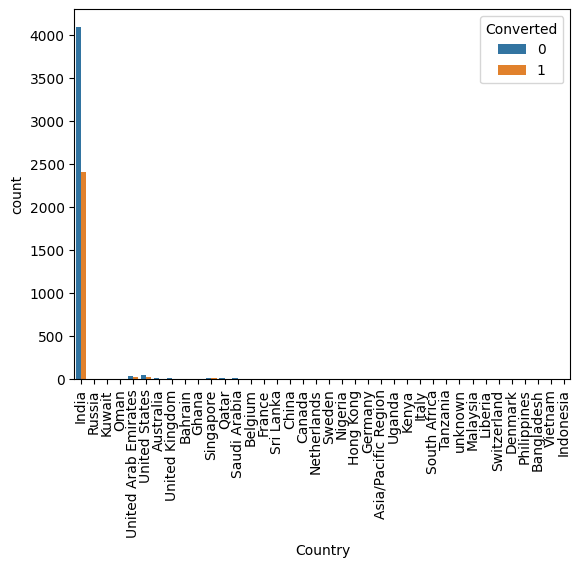

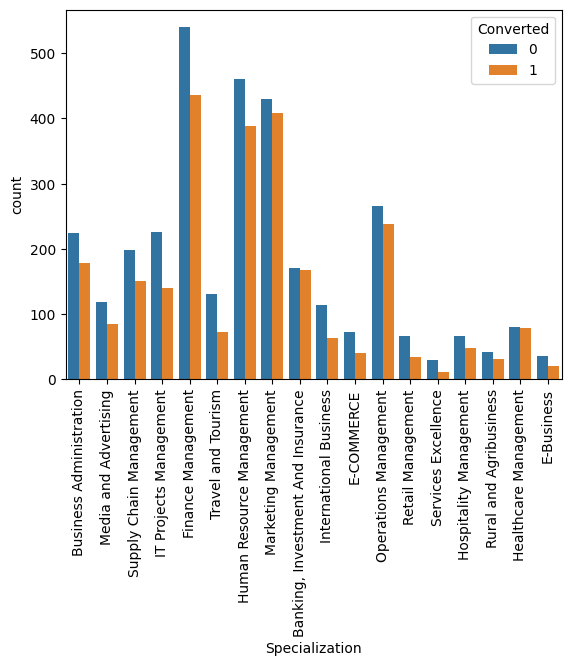

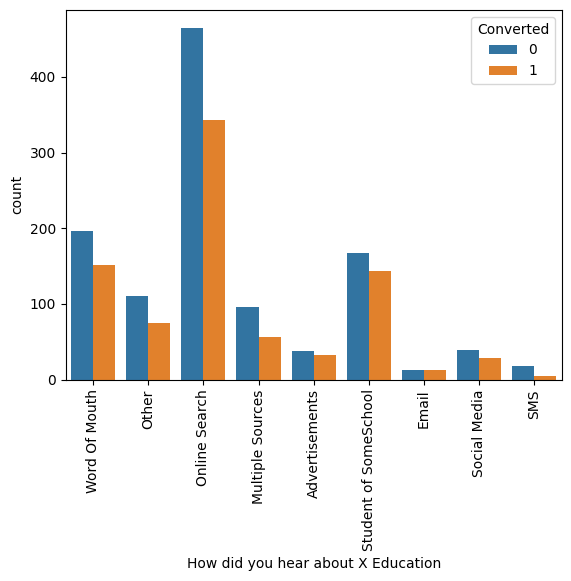

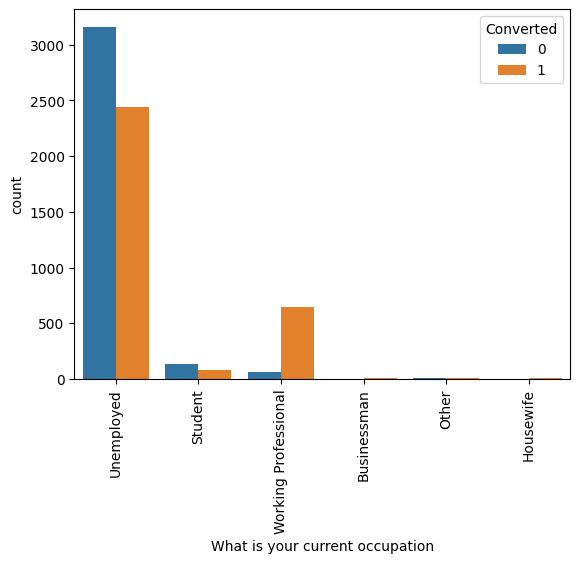

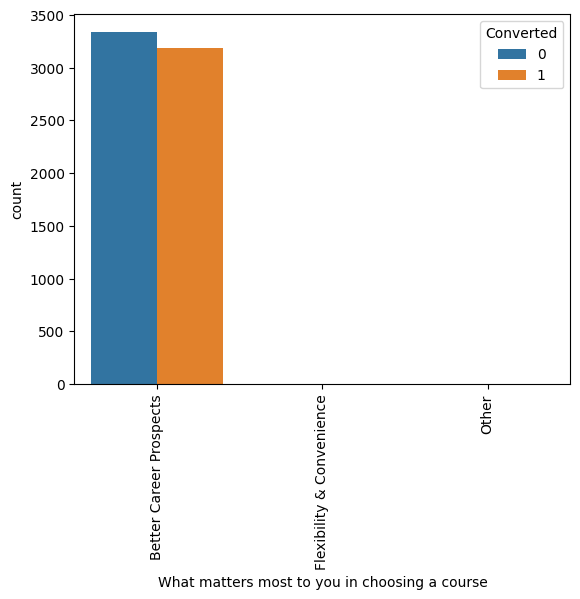

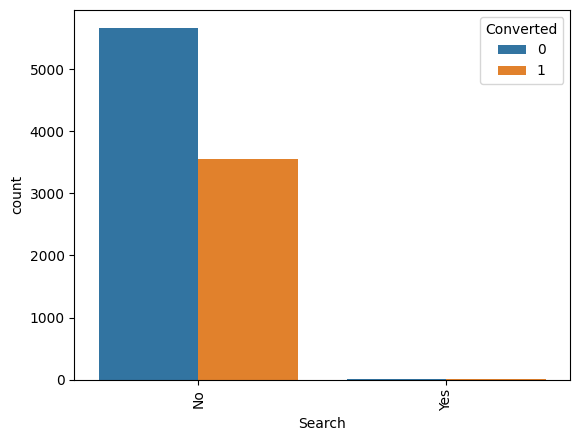

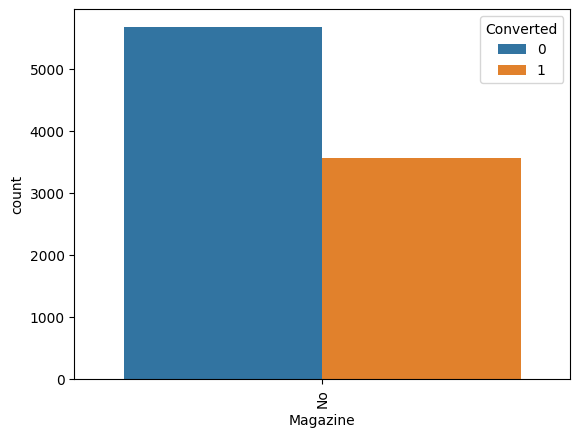

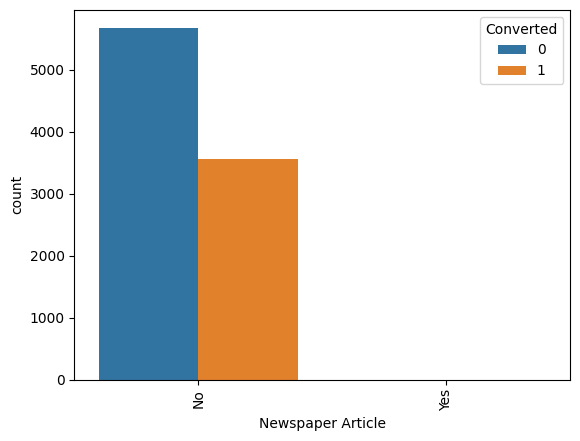

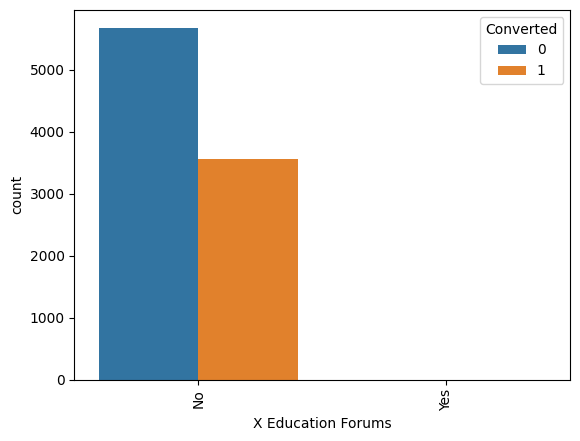

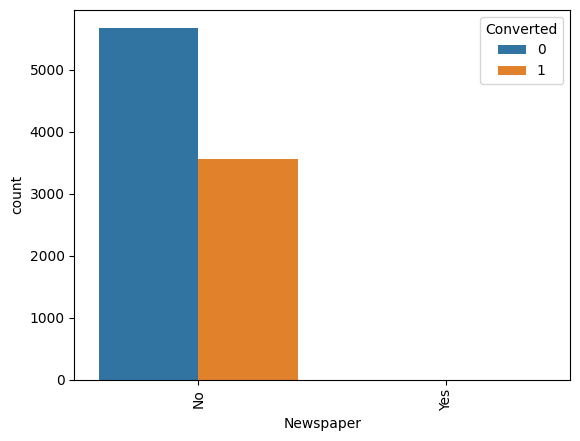

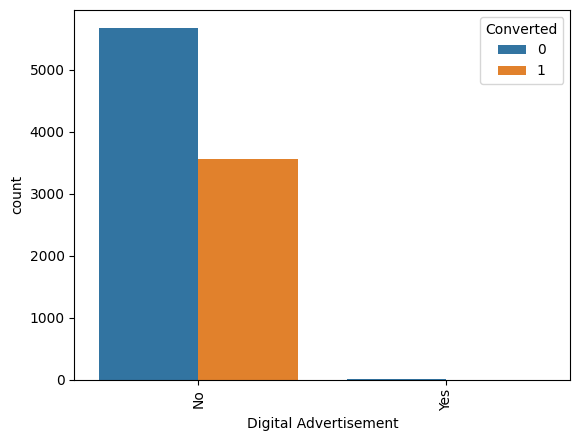

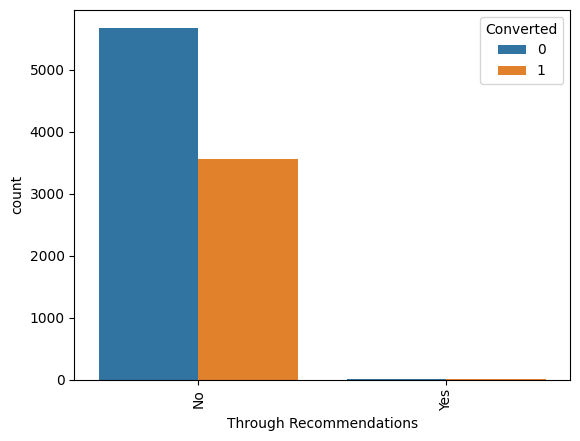

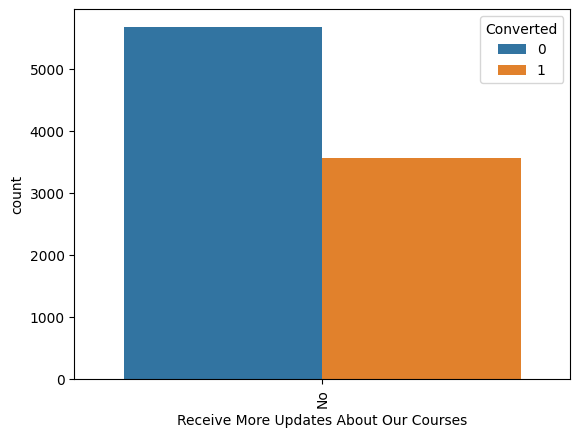

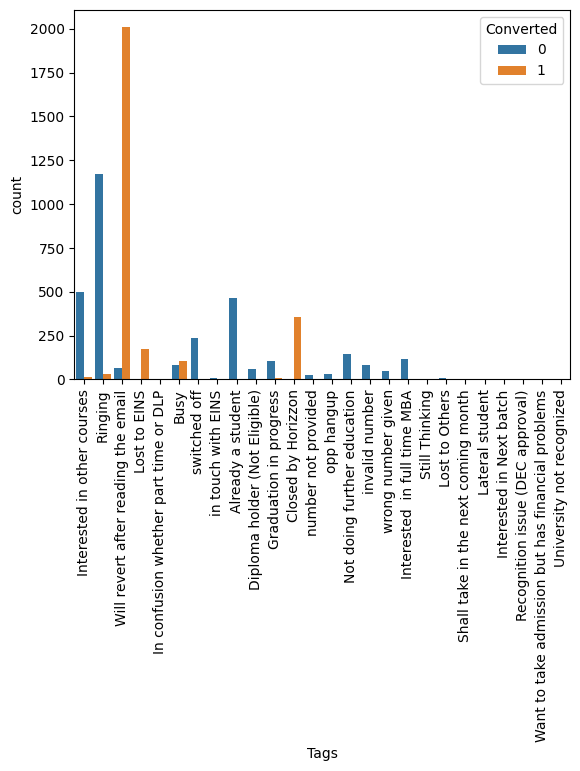

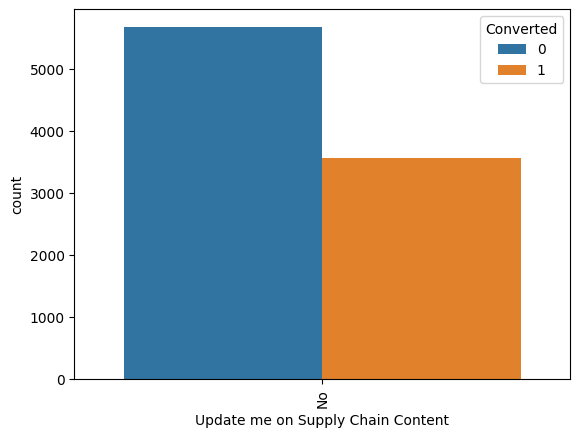

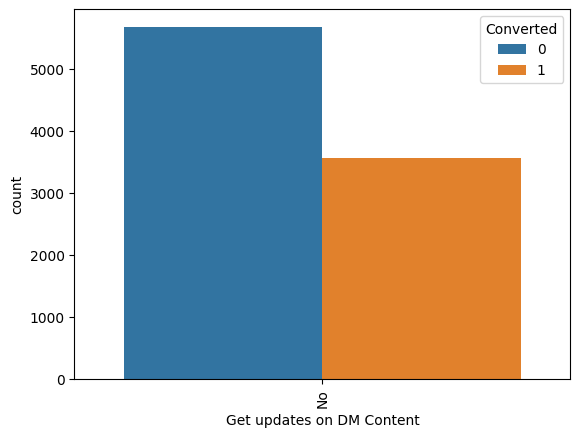

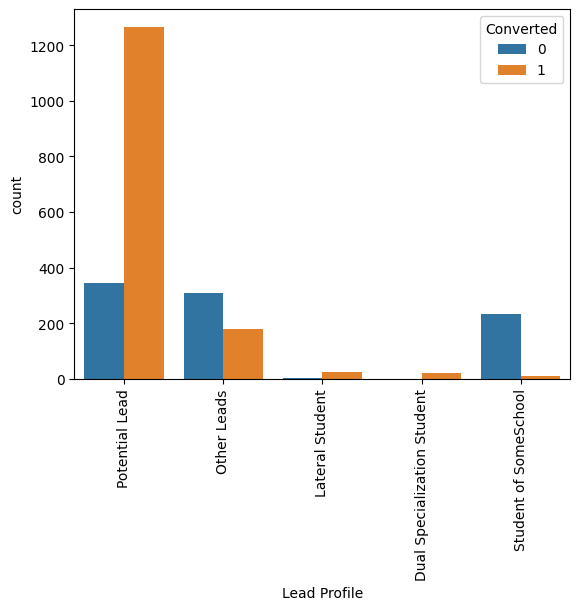

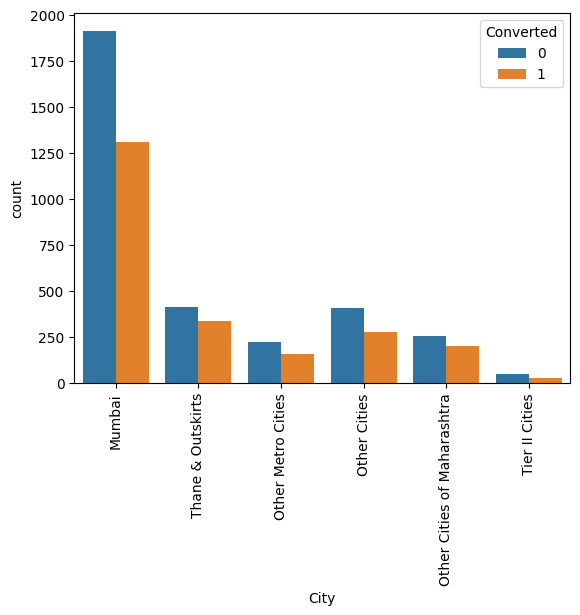

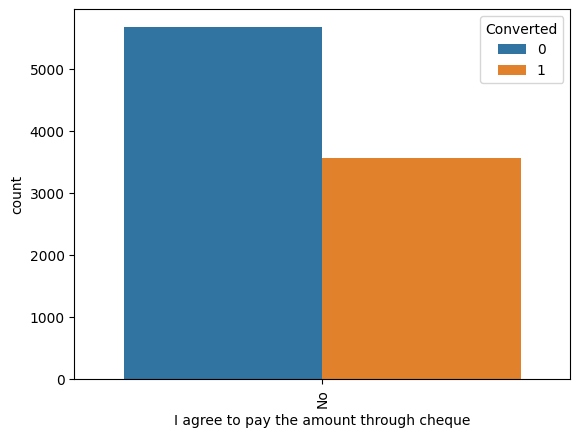

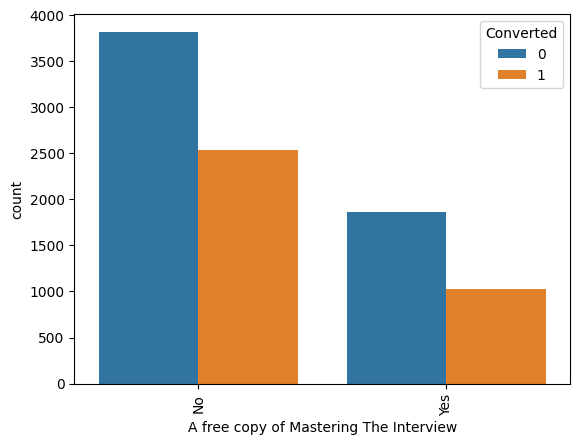

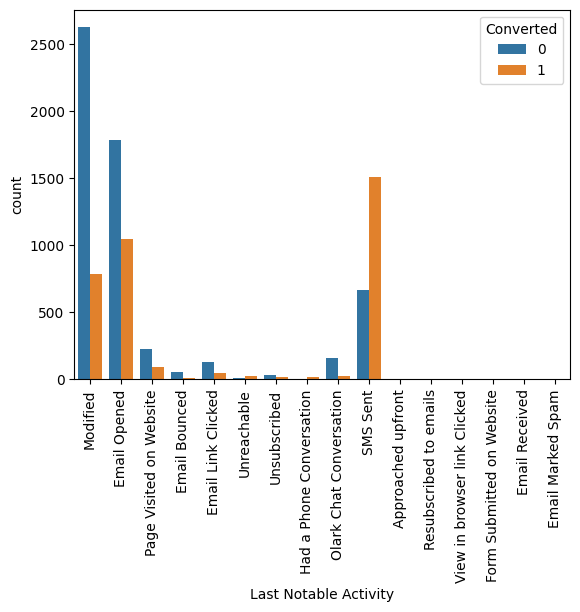

In [857]:
for i in cat:
  sns.countplot(x=df[i], data=df, hue='Converted')
  plt.xticks(rotation=90)
  plt.show()

In [858]:
cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [859]:
# Let's check all variables with high number of categories
# Also fixing the NaN values

In [860]:
round(df[cat].isnull().sum()*100/len(df))

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement                             0.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
Tags                        

In [861]:
# Dropping highly null value columns
col_drop=(['Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags'
,'Lead Profile','City'])

In [862]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [863]:
#Replacing Nan values with Google
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but 'google' instead
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [864]:
#Combining low frequency values to Others

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads',
                                               'testone','NC_EDM','Live Chat'] ,'Others')

In [865]:
#Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [866]:
# Since country is an important variable hence cannot drop but it has got huge null values
#Imputing missing values in Country column with "NA"
df['Country'] = df['Country'].replace(np.nan,'NA')

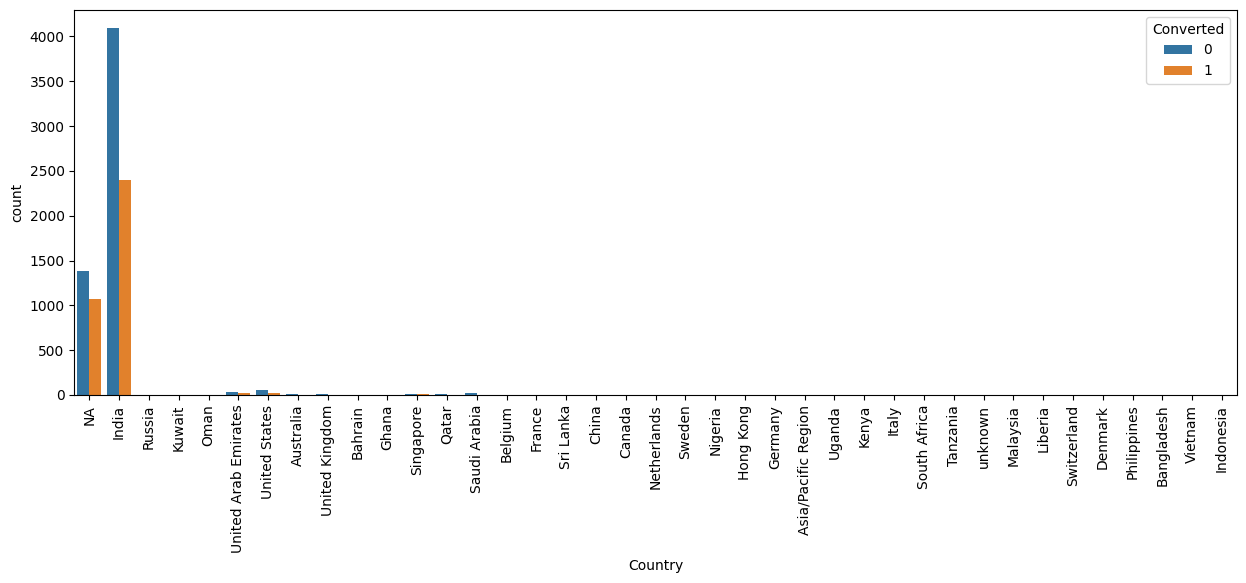

In [867]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Country', hue='Converted' , data=df)
plt.xticks(rotation=90)
plt.show()

In [868]:
# Since most of the leads are from India, lets' considers all other countries in a single category

def country_seg(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "NA":
        category = "NA"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:country_seg(x['Country']), axis = 1)

In [869]:
#Creating new category 'NA' for 'What is your current occupation'

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'NA')

In [870]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NA                      2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

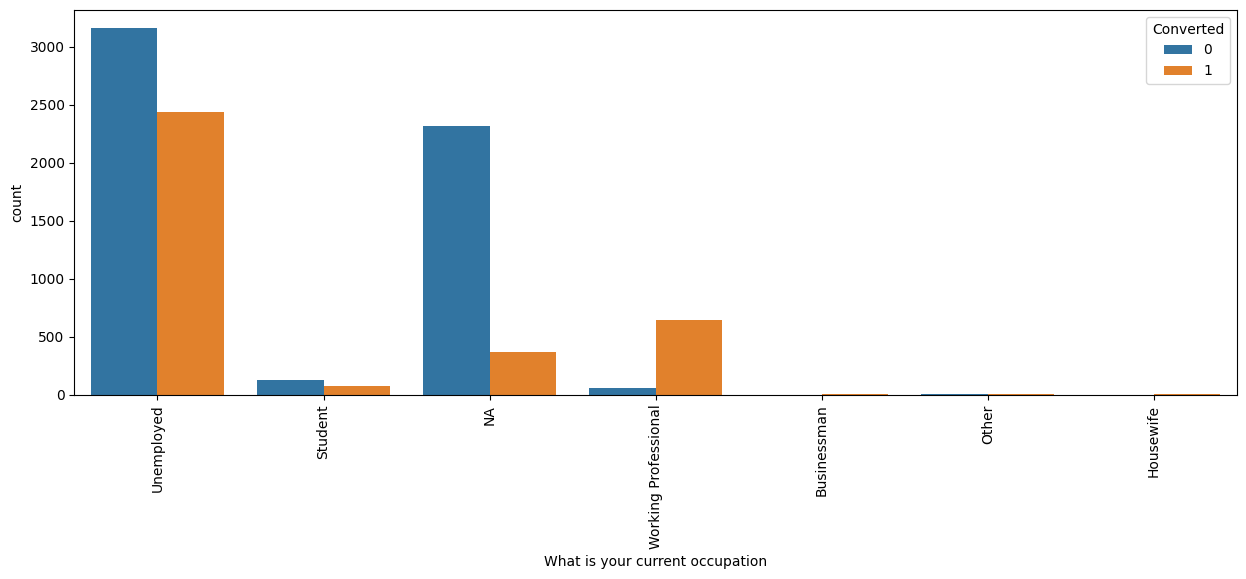

In [871]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'What is your current occupation', hue='Converted' , data=df)
plt.xticks(rotation=90)
plt.show()

In [872]:
df['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [873]:
# We can drop this column as it is huge number of Null values

In [874]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

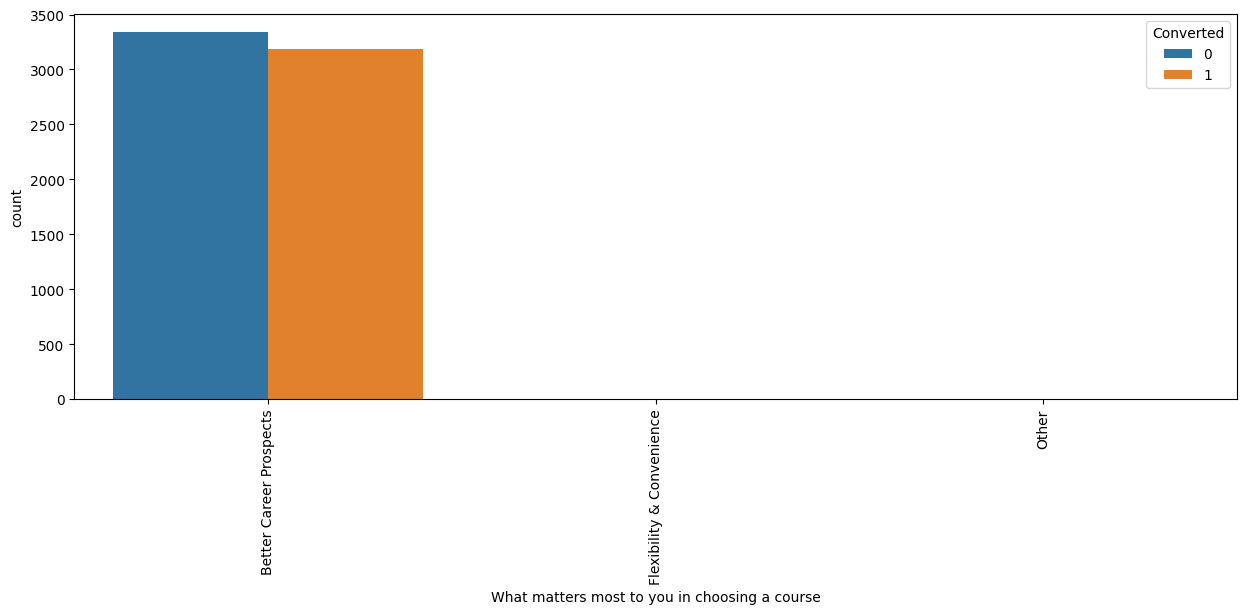

In [875]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data=df)
plt.xticks(rotation=90)
plt.show()

In [876]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [877]:
#Replacing Nan Values with mode value "Email Opened"

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Email Opened')

In [878]:
#combining low frequency values
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [879]:
df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

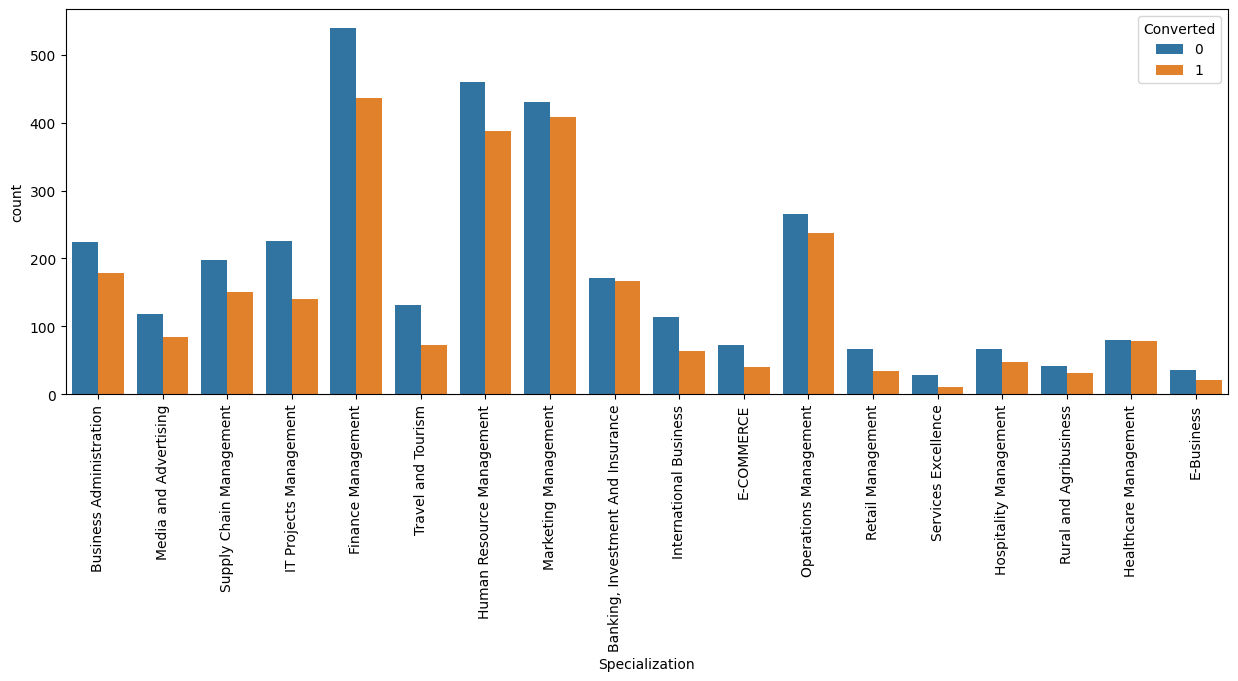

In [880]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Specialization', hue='Converted' , data=df)
plt.xticks(rotation=90)
plt.show()

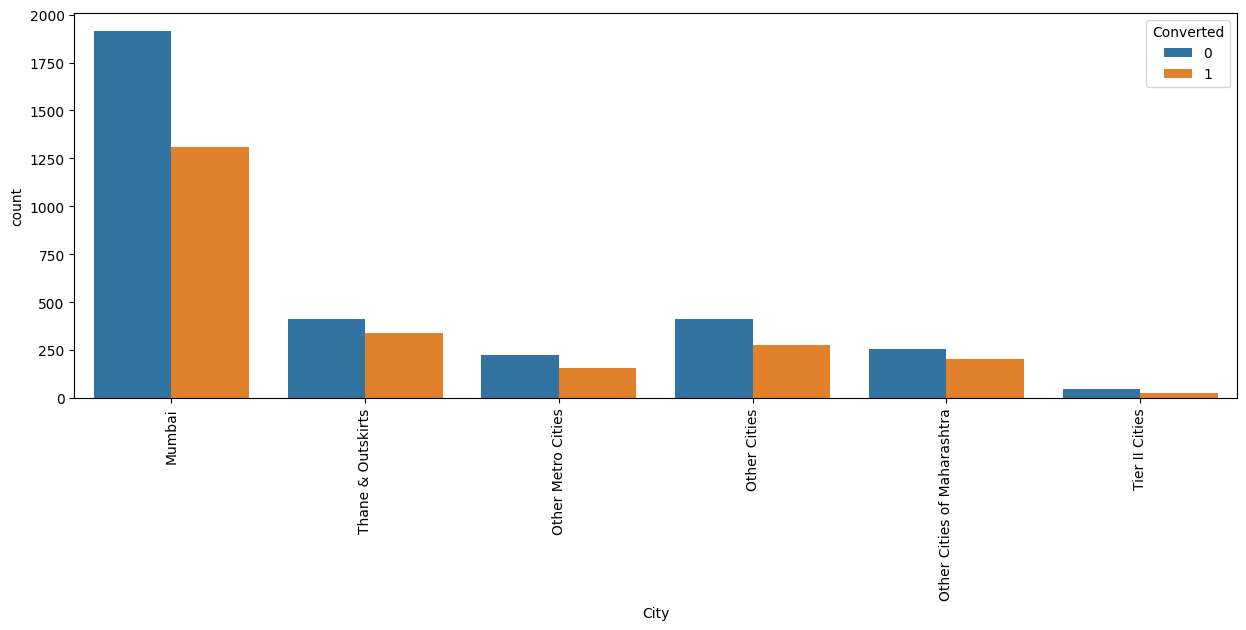

In [881]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'City', hue='Converted' , data=df)
plt.xticks(rotation=90)
plt.show()

In [882]:
df.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

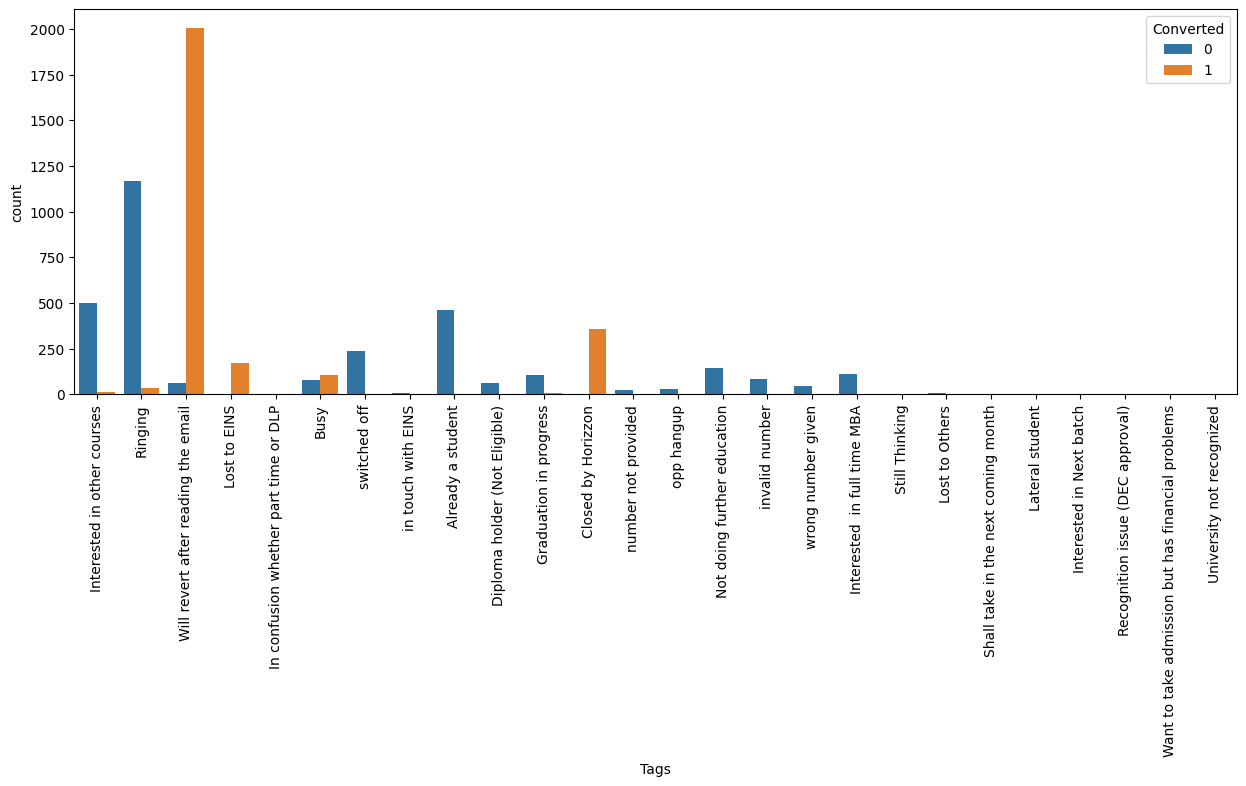

In [883]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Tags', hue='Converted' , data=df)
plt.xticks(rotation=90)
plt.show()

In [884]:
# We can drop tags as it is not giving much insight

col_drop.append('Tags')

In [885]:
df['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

**Numerical Variables**

In [886]:
num

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

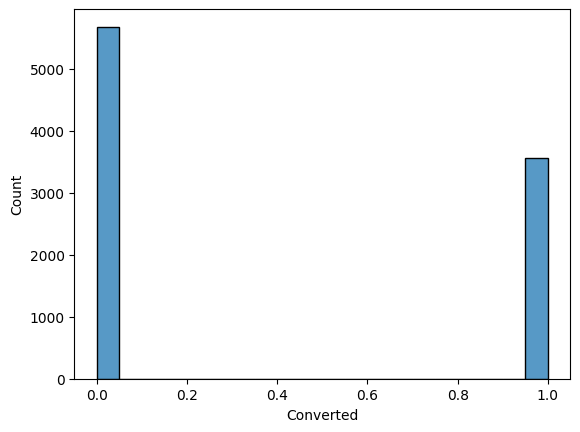

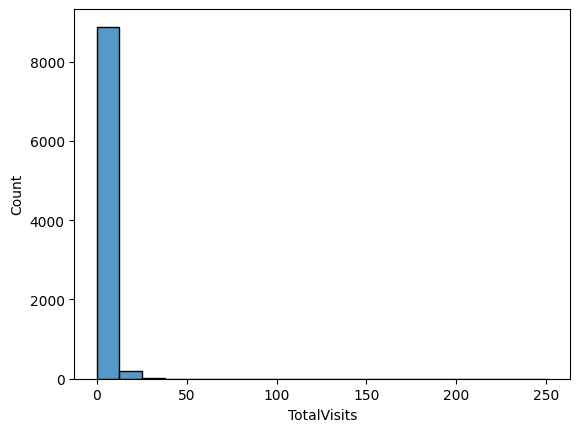

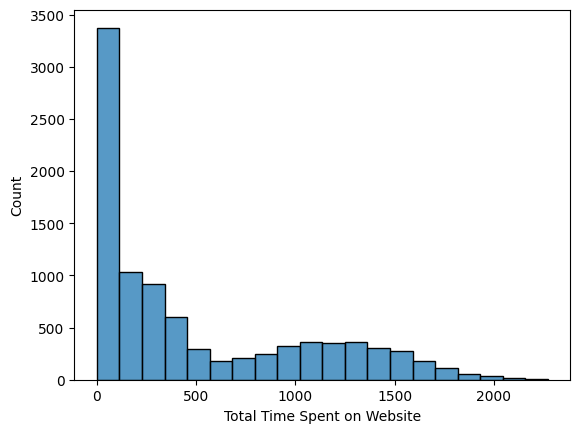

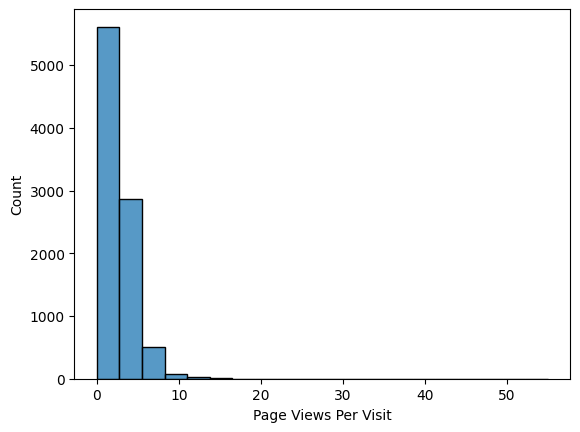

In [887]:
for i in num:
  sns.histplot(df[i],bins=20)
  plt.show()

Outliers check

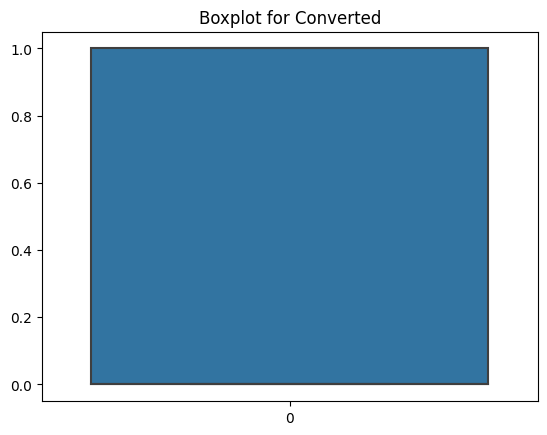

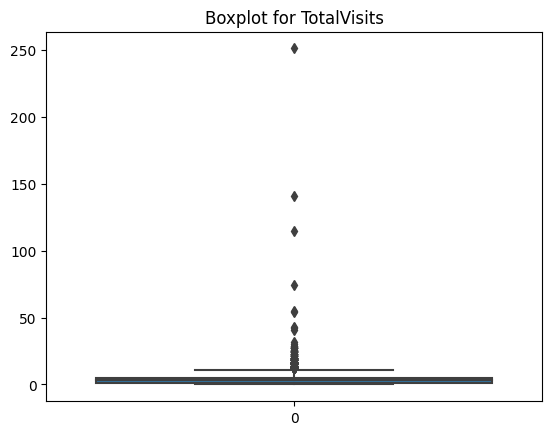

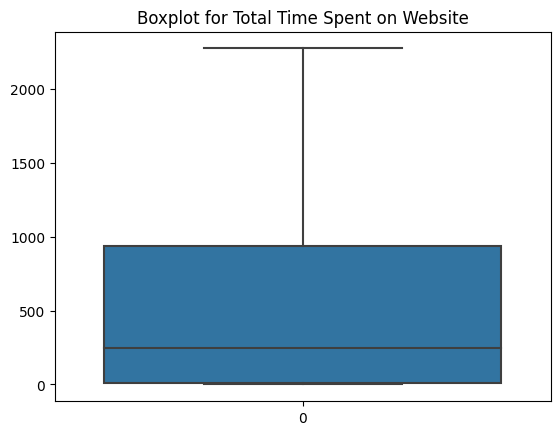

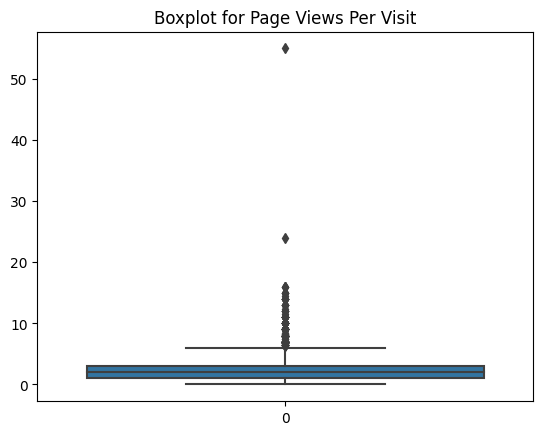

In [888]:
for i in num:
  sns.boxplot(df[i]).set(title=f'Boxplot for {i}')
  plt.show()

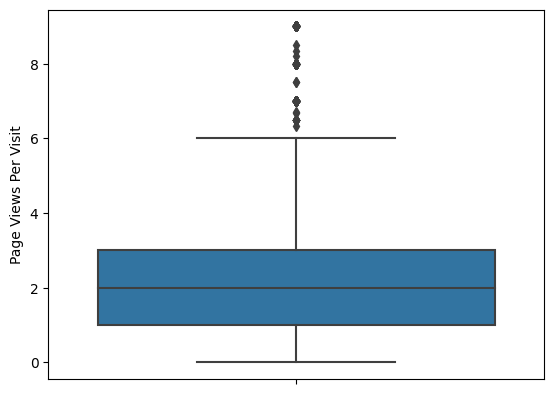

In [889]:
#Outlier Treatment: capping the outliers to 98% value for analysis
percentiles = df['Page Views Per Visit'].quantile([0.01,0.99]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

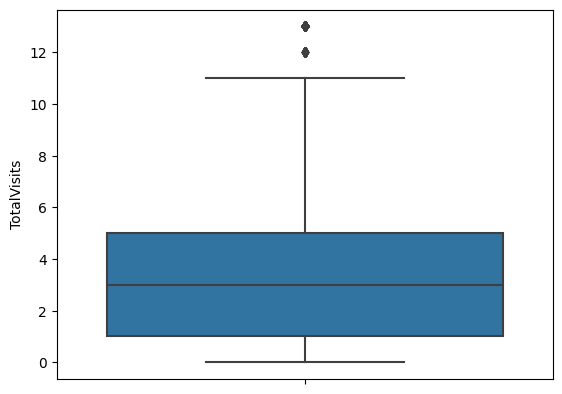

In [890]:
#Outlier Treatment: capping the outliers to 96% value for analysis

percentiles = df['TotalVisits'].quantile([0.02,0.98]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df['TotalVisits'])
plt.show()

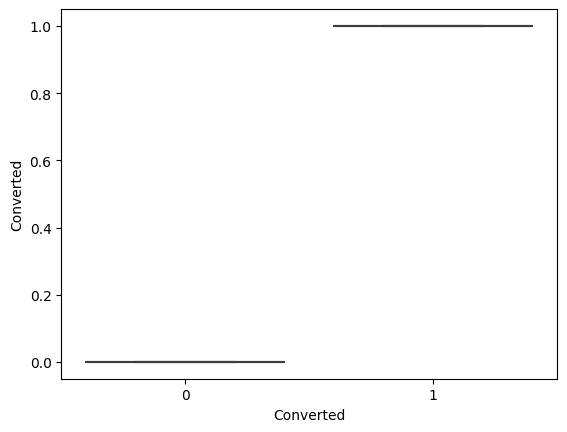

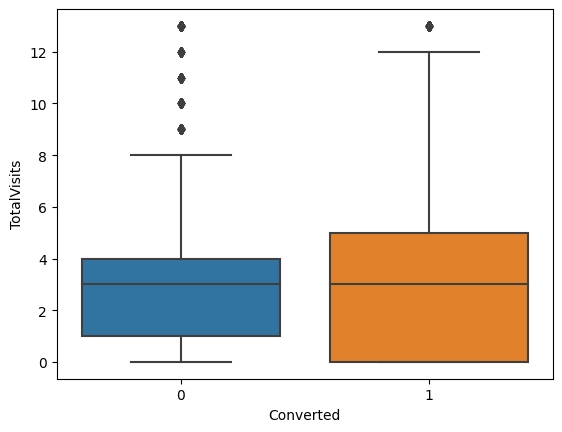

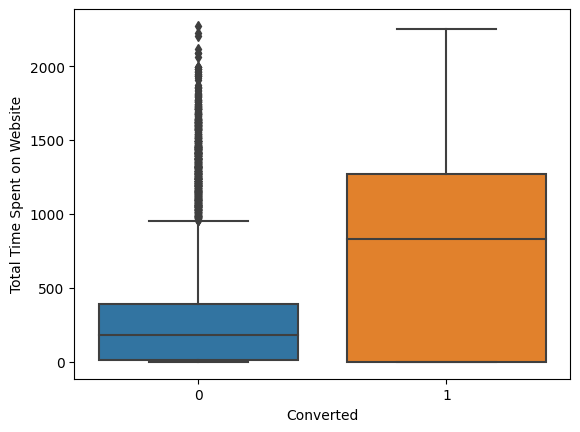

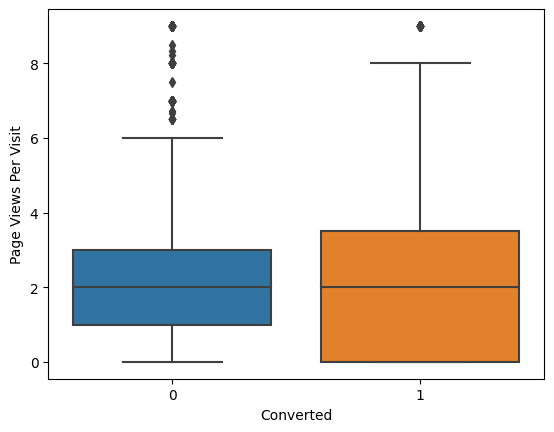

In [891]:
# Plotting graphs with the Target variable
for i in num:
  sns.boxplot(y = i, x = 'Converted', data = df)
  plt.show()

In [892]:
df2=df
df2.drop(col_drop,axis=1,inplace=True)

In [893]:
df2.shape

(9240, 23)

In [894]:
#Dropping target variable
df2.drop('Converted', axis=1)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0.0,0,0.00,Page Visited on Website,NA,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,5.0,674,2.50,Email Opened,India,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,India,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Others,India,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,India,No,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,8.0,1845,2.67,Others,outside india,No,...,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,2.0,238,2.00,SMS Sent,India,No,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,2.0,199,2.00,SMS Sent,India,No,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,3.0,499,3.00,SMS Sent,India,No,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [895]:
#getting a list of categorical columns

cat_new= df2.select_dtypes(include=['object']).columns
cat_new

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [896]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df2[['Country','Lead Origin' ,'Lead Source', 'Do Not Email', 'Last Activity','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df3 = pd.concat([df2, dummy], axis=1)
df3

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NA,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Others,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Others,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [897]:
#Dropping the original columns
df3 = df3.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Country','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df3

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country_NA,Country_outside india,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [898]:
df3.shape

(9240, 44)

In [899]:
df4=df3

In [900]:
df4.dropna(inplace=True)

**Model Building**

In [901]:
#Import the required library
from sklearn.model_selection import train_test_split

In [902]:
X = df4.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country_NA,Country_outside india,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [903]:
y = df4['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [904]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [905]:
#Importing MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country_NA,Country_outside india,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5414,0.153846,0.669454,0.222222,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1411,0.307692,0.555018,0.444444,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2137,0.307692,0.029049,0.147778,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4949,0.461538,0.569982,0.333333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [906]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE


In [907]:
# Running RFE with 15 variables as output
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [908]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Country_NA', True, 1),
 ('Country_outside india', False, 27),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Origin_Quick Add Form', False, 28),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Acti

In [909]:
# Print the selected features
print('Selected features:', X_train.columns[rfe.support_])

Selected features: Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Country_NA', 'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')


In [910]:
sel = X_train.columns[rfe.support_]
sel

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Country_NA', 'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [911]:
len(sel)

15

In [912]:
X_train = X_train[sel]

In [913]:
import statsmodels.api as sm

In [914]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.5
Date:                Mon, 22 May 2023   Deviance:                       5702.9
Time:                        04:39:47   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.8143      0.107     -7.619      0.000      -1.024      -0.605
TotalVisits                                        1.5456      0.217      7.110      0.000       1.120       1.972
Total Time Spent on Website                        4.5804      0.161     28.448      0.000       4.265       4.896
Page Views Per Visit                              -0.9123      0.238     -3.835      0.000      -1.379      -0.446
Country_NA                                         1.3085      0.120     10.867      0.000       1.072       1.544
Lead Origin_Lead Add Form                          2.1991      0.659      3.339      0.001       0.908       3.490
Lead Source_Reference                              1.1441      0.691      1.656      0.098      -0.210       2.498
Lead Source_Welingak Website                       3.1789      1.207      2.635      0.008       0.814       5.544
Do Not Email_Yes                                  -1.7124      0.163    -10.499      0.000      -2.032      -1.393
Last Activity_Olark Chat Conversation             -1.2985      0.189     -6.877      0.000      -1.669      -0.928
Last Notable Activity_Email Link Clicked          -2.0221      0.252     -8.009      0.000      -2.517      -1.527
Last Notable Activity_Email Opened                -1.3899      0.084    -16.493      0.000      -1.555      -1.225
Last Notable Activity_Had a Phone Conversation    21.6076   1.65e+04      0.001      0.999   -3.23e+04    3.23e+04
Last Notable Activity_Modified                    -1.8140      0.093    -19.589      0.000      -1.995      -1.632
Last Notable Activity_Olark Chat Conversation     -1.8260      0.376     -4.863      0.000      -2.562      -1.090
Last Notable Activity_Page Visited on Website     -1.9326      0.200     -9.643      0.000      -2.325      -1.540
==================================================================================================================
"""

In [915]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [916]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,21.15
5,Lead Source_Reference,16.32
2,Page Views Per Visit,5.53
0,TotalVisits,5.46
6,Lead Source_Welingak Website,5.39
3,Country_NA,2.19
12,Last Notable Activity_Modified,2.02
1,Total Time Spent on Website,1.95
8,Last Activity_Olark Chat Conversation,1.92
10,Last Notable Activity_Email Opened,1.75


In [917]:
# Removing 'Last Notable Activity_Had a Phone Conversation' with high p-value

In [918]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [919]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.7
Date:                Mon, 22 May 2023   Deviance:                       5707.4
Time:                        04:39:47   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3558
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8075      0.107     -7.561      0.000      -1.017      -0.598
TotalVisits                                       1.5509      0.217      7.149      0.000       1.126       1.976
Total Time Spent on Website                       4.5771      0.161     28.442      0.000       4.262       4.892
Page Views Per Visit                             -0.9138      0.238     -3.844      0.000      -1.380      -0.448
Country_NA                                        1.3065      0.120     10.851      0.000       1.071       1.543
Lead Origin_Lead Add Form                         2.1985      0.659      3.337      0.001       0.907       3.490
Lead Source_Reference                             1.1455      0.691      1.658      0.097      -0.209       2.500
Lead Source_Welingak Website                      3.1808      1.207      2.636      0.008       0.816       5.546
Do Not Email_Yes                                 -1.7166      0.163    -10.523      0.000      -2.036      -1.397
Last Activity_Olark Chat Conversation            -1.2977      0.189     -6.873      0.000      -1.668      -0.928
Last Notable Activity_Email Link Clicked         -2.0285      0.252     -8.036      0.000      -2.523      -1.534
Last Notable Activity_Email Opened               -1.3966      0.084    -16.584      0.000      -1.562      -1.232
Last Notable Activity_Modified                   -1.8203      0.093    -19.667      0.000      -2.002      -1.639
Last Notable Activity_Olark Chat Conversation    -1.8324      0.376     -4.880      0.000      -2.568      -1.096
Last Notable Activity_Page Visited on Website    -1.9406      0.200     -9.687      0.000      -2.333      -1.548
=================================================================================================================
"""

In [920]:
# Removing 'Lead Source_Reference' with high p-value
X_train.drop('Lead Source_Reference', axis=1, inplace=True)

In [921]:
# Refit the model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.8
Date:                Mon, 22 May 2023   Deviance:                       5709.7
Time:                        04:39:47   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3556
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8082      0.107     -7.568      0.000      -1.018      -0.599
TotalVisits                                       1.5496      0.217      7.143      0.000       1.124       1.975
Total Time Spent on Website                       4.5755      0.161     28.436      0.000       4.260       4.891
Page Views Per Visit                             -0.9132      0.238     -3.841      0.000      -1.379      -0.447
Country_NA                                        1.3052      0.120     10.844      0.000       1.069       1.541
Lead Origin_Lead Add Form                         3.2586      0.225     14.504      0.000       2.818       3.699
Lead Source_Welingak Website                      2.1227      1.037      2.048      0.041       0.091       4.154
Do Not Email_Yes                                 -1.7280      0.164    -10.554      0.000      -2.049      -1.407
Last Activity_Olark Chat Conversation            -1.2992      0.189     -6.884      0.000      -1.669      -0.929
Last Notable Activity_Email Link Clicked         -2.0218      0.252     -8.031      0.000      -2.515      -1.528
Last Notable Activity_Email Opened               -1.3946      0.084    -16.564      0.000      -1.560      -1.230
Last Notable Activity_Modified                   -1.8162      0.092    -19.637      0.000      -1.997      -1.635
Last Notable Activity_Olark Chat Conversation    -1.8259      0.375     -4.868      0.000      -2.561      -1.091
Last Notable Activity_Page Visited on Website    -1.9385      0.200     -9.673      0.000      -2.331      -1.546
=================================================================================================================
"""

In [922]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.53
0,TotalVisits,5.45
3,Country_NA,2.19
10,Last Notable Activity_Modified,2.02
1,Total Time Spent on Website,1.95
7,Last Activity_Olark Chat Conversation,1.92
9,Last Notable Activity_Email Opened,1.75
4,Lead Origin_Lead Add Form,1.70
11,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Welingak Website,1.27


In [923]:
# Removing high VIF variables
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [924]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.3
Date:                Mon, 22 May 2023   Deviance:                       5724.6
Time:                        04:39:47   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3541
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9785      0.097    -10.056      0.000      -1.169      -0.788
TotalVisits                                       1.0633      0.176      6.051      0.000       0.719       1.408
Total Time Spent on Website                       4.5655      0.161     28.422      0.000       4.251       4.880
Country_NA                                        1.4451      0.115     12.544      0.000       1.219       1.671
Lead Origin_Lead Add Form                         3.2757      0.225     14.584      0.000       2.835       3.716
Lead Source_Welingak Website                      2.1206      1.037      2.046      0.041       0.089       4.152
Do Not Email_Yes                                 -1.7357      0.163    -10.618      0.000      -2.056      -1.415
Last Activity_Olark Chat Conversation            -1.2839      0.189     -6.806      0.000      -1.654      -0.914
Last Notable Activity_Email Link Clicked         -1.9763      0.251     -7.875      0.000      -2.468      -1.484
Last Notable Activity_Email Opened               -1.3767      0.084    -16.408      0.000      -1.541      -1.212
Last Notable Activity_Modified                   -1.7962      0.092    -19.494      0.000      -1.977      -1.616
Last Notable Activity_Olark Chat Conversation    -1.7794      0.373     -4.770      0.000      -2.511      -1.048
Last Notable Activity_Page Visited on Website    -1.7738      0.193     -9.169      0.000      -2.153      -1.395
=================================================================================================================
"""

In [925]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.53
2,Country_NA,2.16
9,Last Notable Activity_Modified,1.93
6,Last Activity_Olark Chat Conversation,1.91
1,Total Time Spent on Website,1.87
3,Lead Origin_Lead Add Form,1.70
8,Last Notable Activity_Email Opened,1.69
10,Last Notable Activity_Olark Chat Conversation,1.34
4,Lead Source_Welingak Website,1.27
11,Last Notable Activity_Page Visited on Website,1.18


**All the VIF values are good and all the p-values are below 0.05 now.**

In [926]:
# Making prediction
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

5414    0.903915
1411    0.521594
2137    0.130638
97      0.068277
4949    0.892308
dtype: float64

In [927]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()



,Converted,Conversion_Prob
0,1,0.903915
1,1,0.521594
2,0,0.130638
3,0,0.068277
4,1,0.892308


In [928]:
# Substituting 0 or 1 with the cut off as 0.6
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.903915,1
1,1,0.521594,1
2,0,0.130638,0
3,0,0.068277,0
4,1,0.892308,1


**Evaluation**

In [929]:
from sklearn import metrics

In [930]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3385,  516],
       [ 802, 1669]])

In [931]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.793157564344005

In [932]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [933]:
# Calculating the sensitivity
sens=TP/(TP+FN)

# Calculating the specificity
spec=TN/(TN+FP)

print(sens, spec)

0.6754350465398624 0.8677262240451167


**ROC Curve Plot**

In [934]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [935]:
FPR, TPR, threshold = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

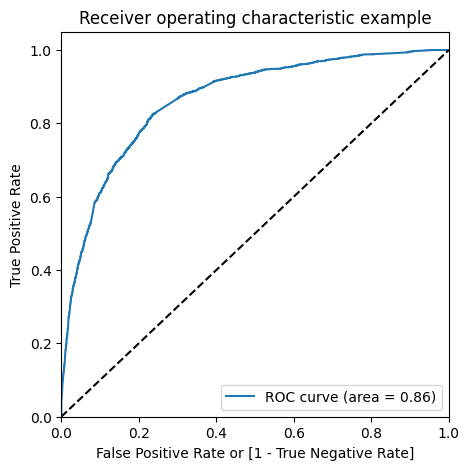

In [936]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [937]:
# Area under ROC is 86%
# Creating columns with different  cutoffs 
num_list = [float(x)/10 for x in range(10)]
for i in num_list:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.903915,1,1,1,1,1,1,1,1,1,1,1
1,1,0.521594,1,1,1,1,1,1,1,0,0,0,0
2,0,0.130638,0,1,1,0,0,0,0,0,0,0,0
3,0,0.068277,0,1,0,0,0,0,0,0,0,0,0
4,1,0.892308,1,1,1,1,1,1,1,1,1,1,0


In [938]:
co_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each probablity
from sklearn.metrics import confusion_matrix
co = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in co:
    cm_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm_new))
    accuracy = (cm_new[0,0]+cm_new[1,1])/total
    sensitivity = cm_new[1,1]/(cm_new[1,0]+cm_new[1,1])
    specificity = cm_new[0,0]/(cm_new[0,0]+cm_new[0,1]) 
    co_df.loc[i] =[i,accuracy,sensitivity,specificity]
co_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.387790,1.000000,0.000000
0.1,0.1,0.559479,0.975718,0.295822
0.2,0.2,0.719554,0.917442,0.594207
0.3,0.3,0.786566,0.825577,0.761856
0.4,0.4,0.788449,0.755565,0.809280
0.5,0.5,0.793158,0.675435,0.867726
0.6,0.6,0.784997,0.590449,0.908229
0.7,0.7,0.754080,0.450830,0.946168
0.8,0.8,0.731952,0.359369,0.967957
0.9,0.9,0.683302,0.204371,0.986670


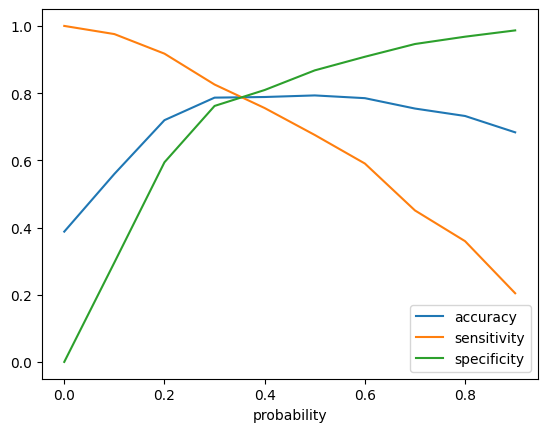

In [939]:
co_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [940]:
y_train_pred_final['Final_pred'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_pred
0,1,0.903915,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.521594,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.130638,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.068277,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.892308,1,1,1,1,1,1,1,1,1,1,0,1


In [941]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_pred)

0.7893910860012555

In [942]:
confusion_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_pred)
confusion_new

array([[3117,  784],
       [ 558, 1913]])

In [943]:

TPn = confusion_new[1,1]
TNn = confusion_new[0,0]
FPn = confusion_new[0,1]
FNn = confusion_new[1,0]

In [944]:
# Calculating the sensitivity
sensn=TPn/(TPn+FNn)

# Calculating the specificity
specn=TNn/(TNn+FPn)

print(sensn, specn)

0.774180493727236 0.7990258907972315


**Let's predict on test set**

In [945]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [946]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country_NA,Country_outside india,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5643,0.076923,0.027650,0.111111,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7718,0.461538,0.147465,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4666,0.230769,0.094009,0.166667,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3476,0.461538,0.100000,0.333333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4881,0.307692,0.420737,0.444444,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [947]:
sel2 = X_train.columns

In [948]:
X_test = X_test[sel2]
X_test.head()

,TotalVisits,Total Time Spent on Website,Country_NA,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
5643,0.076923,0.027650,0,0,0,1,0,0,0,1,0,0
7718,0.461538,0.147465,0,0,0,0,0,0,1,0,0,0
4666,0.230769,0.094009,0,0,0,0,0,0,0,1,0,0
3476,0.461538,0.100000,0,0,0,0,0,0,1,0,0,0
4881,0.307692,0.420737,0,0,0,0,0,0,1,0,0,0


In [949]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2731, 13)

In [950]:
y_test_pred = res.predict(X_test_sm) 
y_test_pred[:10]

5643    0.013356
7718    0.233059
4666    0.109088
3476    0.196578
4881    0.473254
1553    0.624163
4805    0.096330
6393    0.180835
7148    0.286994
4652    0.650718
dtype: float64

In [951]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
5643,0.013356
7718,0.233059
4666,0.109088
3476,0.196578
4881,0.473254


In [952]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [953]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [954]:
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5643,0.013356
1,0,7718,0.233059
2,0,4666,0.109088
3,0,3476,0.196578
4,1,4881,0.473254


In [955]:
y_pred_final= y_pred_final.rename(columns={0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,5643,0.013356
1,0,7718,0.233059
2,0,4666,0.109088
3,0,3476,0.196578
4,1,4881,0.473254


In [957]:
#Assigning a lead score
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,5643,0,0.013356,1
1,7718,0,0.233059,23
2,4666,0,0.109088,11
3,3476,0,0.196578,20
4,4881,1,0.473254,47


In [960]:
y_pred_final['Final_Prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,Final_Prediction
0,5643,0,0.013356,1,0
1,7718,0,0.233059,23,0
2,4666,0,0.109088,11,0
3,3476,0,0.196578,20,0
4,4881,1,0.473254,47,1


In [961]:
y_pred_final.Final_Prediction.value_counts()

0    1589
1    1142
Name: Final_Prediction, dtype: int64

In [964]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Prediction)

0.8103258879531308

In [965]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Prediction )
confusion3

array([[1406,  335],
       [ 183,  807]])

In [966]:
# Substituting the value of true positive
TP3 = confusion3[1,1]
# Substituting the value of true negatives
TN3 = confusion3[0,0]
# Substituting the value of false positives
FP3 = confusion3[0,1] 
# Substituting the value of false negatives
FN3 = confusion3[1,0]

In [967]:
# Precision
TP3 / (TP3 + FP3)

0.7066549912434326

In [968]:
# Recall
TP3 / (TP3 + FN3)

0.8151515151515152